In [7]:
from sqlalchemy import create_engine
import mysql.connector
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Set up the MySQL connection
connection = mysql.connector.connect(
    host='127.0.0.1',      # Replace with your MySQL host (e.g., 'localhost' or an IP address)
    user='root',      # Your MySQL username
    password='1641',  # Your MySQL password
    database='transaction' # Name of the database containing your table
)

In [9]:
# SQL query to fetch all data from the 'transactions' table
query = "SELECT * FROM transactions_temp"

# Load the data into a Pandas DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Display the first few rows of the dataframe
df.head()

C:\Users\asian\AppData\Local\Temp\ipykernel_1248\352766979.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,1/12/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,1/12/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,1/12/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,1/12/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,1/12/2010 8:45,0.65,12583.0,France


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [11]:
invalid_dates = df[df['InvoiceDate'].isnull()]
print(invalid_dates)

     InvoiceNo StockCode                         Description  Quantity  \
284     539050     21069           VINTAGE BILLBOARD TEA MUG         1   
285     539050     21328               BALLOONS  WRITING SET         1   
286     539050     22631             CIRCUS PARADE LUNCH BOX         1   
287     539050     20751    FUNKY WASHING UP GLOVES ASSORTED         1   
288     539050     84826      ASSTD DESIGN 3D PAPER STICKERS         2   
...        ...       ...                                 ...       ...   
8079    579870     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
8080    579870    84279P    CHERRY BLOSSOM  DECORATIVE FLASK         4   
8081    579870     22551            PLASTERS IN TIN SPACEBOY        12   
8082    579870     22554    PLASTERS IN TIN WOODLAND ANIMALS        12   
8083    579870      POST                             POSTAGE         2   

     InvoiceDate  UnitPrice  CustomerID Country  
284          NaT       1.25     12577.0  France  
285        

In [12]:
# Check for rows where 'InvoiceDate' is not a valid date
invalid_dates = df[df['InvoiceDate'].isna()]
print(invalid_dates)

     InvoiceNo StockCode                         Description  Quantity  \
284     539050     21069           VINTAGE BILLBOARD TEA MUG         1   
285     539050     21328               BALLOONS  WRITING SET         1   
286     539050     22631             CIRCUS PARADE LUNCH BOX         1   
287     539050     20751    FUNKY WASHING UP GLOVES ASSORTED         1   
288     539050     84826      ASSTD DESIGN 3D PAPER STICKERS         2   
...        ...       ...                                 ...       ...   
8079    579870     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
8080    579870    84279P    CHERRY BLOSSOM  DECORATIVE FLASK         4   
8081    579870     22551            PLASTERS IN TIN SPACEBOY        12   
8082    579870     22554    PLASTERS IN TIN WOODLAND ANIMALS        12   
8083    579870      POST                             POSTAGE         2   

     InvoiceDate  UnitPrice  CustomerID Country  
284          NaT       1.25     12577.0  France  
285        

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', format='%d/%m/%Y %H:%M')

In [14]:
df = df.dropna(subset=['InvoiceDate'])

In [15]:
print(df['InvoiceDate'].head())

0   2010-01-12 08:45:00
1   2010-01-12 08:45:00
2   2010-01-12 08:45:00
3   2010-01-12 08:45:00
4   2010-01-12 08:45:00
Name: InvoiceDate, dtype: datetime64[ns]


In [16]:
print(df['InvoiceDate'].min())  # Get the earliest date
print(df['InvoiceDate'].max())  # Get the latest date

2010-01-12 08:45:00
2011-12-10 14:46:00


In [17]:
print(df.isnull().sum())

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     49
Country         0
dtype: int64


In [18]:
# Display rows where CustomerID is NaN
missing_customer_ids = df[df['CustomerID'].isna()]
print(missing_customer_ids)

     InvoiceNo StockCode                          Description  Quantity  \
6787    574918     22227      HANGING HEART MIRROR DECORATION        52   
6788    574918     22602    RETROSPOT WOODEN HEART DECORATION        20   
6789    574918     21818             GLITTER HEART DECORATION        20   
6790    574918     22338         STAR DECORATION PAINTED ZINC        10   
6791    574918     22219    LOVEBIRD HANGING DECORATION WHITE        32   
6792    574918     22335        HEART DECORATION PAINTED ZINC        22   
6793    574918     23201                   JUMBO BAG ALPHABET         2   
6794    574918    85136A              YELLOW SHARK HELICOPTER         1   
6795    574918     21822    GLITTER CHRISTMAS TREE WITH BELLS        12   
6796    574918     22948    METAL DECORATION NAUGHTY CHILDREN        24   
6797    574918     21811              HANGING HEART WITH BELL        48   
6798    574918     84836          ZINC METAL HEART DECORATION        24   
6799    574918     22989 

In [19]:
df.dropna(subset=['CustomerID'], inplace=True)

In [20]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [21]:
print(df['StockCode'].nunique())


1141


In [22]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
sales_by_country = df.groupby('Country')['TotalSales'].sum()
print(sales_by_country)

Country
France    85119.95
Name: TotalSales, dtype: float64


In [23]:
# View the first 10 rows
print(df.head(10))

# View the last 5 rows
print(df.tail())

# View a random sample of 5 rows
print(df.sample(5))


  InvoiceNo StockCode                         Description  Quantity  \
0    536370     22728           ALARM CLOCK BAKELIKE PINK        24   
1    536370     22727            ALARM CLOCK BAKELIKE RED        24   
2    536370     22726          ALARM CLOCK BAKELIKE GREEN        12   
3    536370     21724     PANDA AND BUNNIES STICKER SHEET        12   
4    536370     21883                     STARS GIFT TAPE        24   
5    536370     10002          INFLATABLE POLITICAL GLOBE        48   
6    536370     21791   VINTAGE HEADS AND TAILS CARD GAME        24   
7    536370     21035      SET/2 RED RETROSPOT TEA TOWELS        18   
8    536370     22326  ROUND SNACK BOXES SET OF4 WOODLAND        24   
9    536370     22629                  SPACEBOY LUNCH BOX        24   

          InvoiceDate  UnitPrice  CustomerID Country  TotalSales  
0 2010-01-12 08:45:00       3.75     12583.0  France        90.0  
1 2010-01-12 08:45:00       3.75     12583.0  France        90.0  
2 2010-01-12 08:4

In [24]:
# Extract relevant features (total sales per transaction, or total quantity of items purchased)
df_grouped = df.groupby('CustomerID').agg({'TotalSales': 'sum', 'Quantity': 'sum'}).reset_index()


In [25]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped[['TotalSales', 'Quantity']])

In [26]:

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df_grouped['Cluster'] = kmeans.fit_predict(df_scaled)

In [27]:
# Show the clusters
print(df_grouped.head())

   CustomerID  TotalSales  Quantity  Cluster
0     12413.0      673.45       261        3
1     12437.0     2040.81      1178        2
2     12441.0      173.55       121        3
3     12489.0      334.93       105        3
4     12490.0     2463.06      1360        2


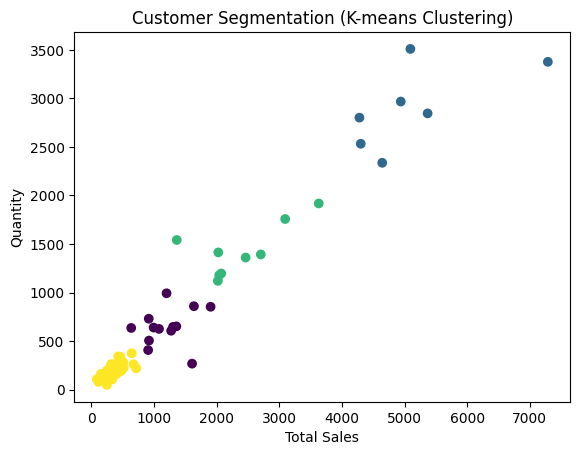

In [28]:
# Optionally: Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df_grouped['TotalSales'], df_grouped['Quantity'], c=df_grouped['Cluster'])
plt.xlabel('Total Sales')
plt.ylabel('Quantity')
plt.title('Customer Segmentation (K-means Clustering)')
plt.show()

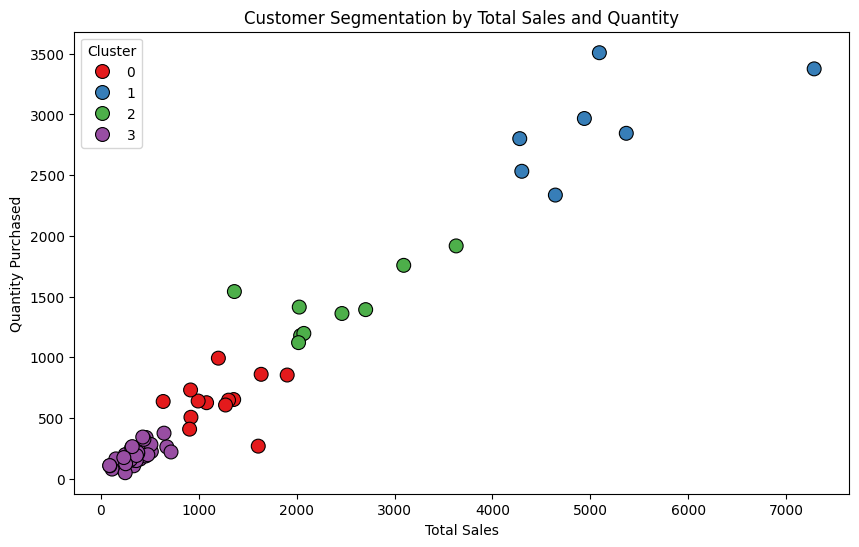

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_customer is your DataFrame and 'Cluster' is the column with the cluster assignments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_grouped, x='TotalSales', y='Quantity', hue='Cluster', palette='Set1', s=100, edgecolor='black')
plt.title('Customer Segmentation by Total Sales and Quantity')
plt.xlabel('Total Sales')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.show()


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Distribution of numerical columns (like Quantity, UnitPrice, TotalSales)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Quantity Distribution')

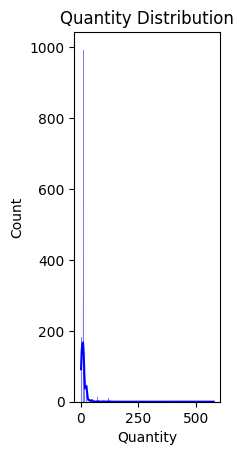

In [33]:
# Quantity distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Quantity'], kde=True, color='blue')
plt.title('Quantity Distribution')

Text(0.5, 1.0, 'UnitPrice Distribution')

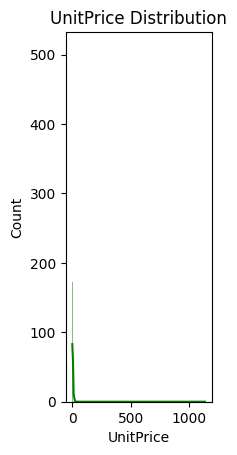

In [34]:

# UnitPrice distribution
plt.subplot(1, 3, 2)
sns.histplot(df['UnitPrice'], kde=True, color='green')
plt.title('UnitPrice Distribution')

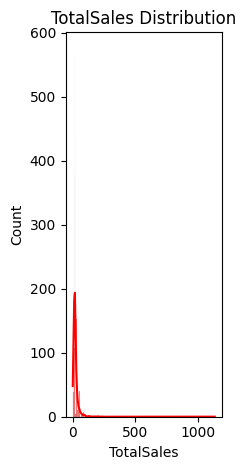

In [36]:
# TotalSales distribution
plt.subplot(1, 3, 3)
sns.histplot(df['TotalSales'], kde=True, color='red')
plt.title('TotalSales Distribution')
plt.tight_layout()
plt.show()

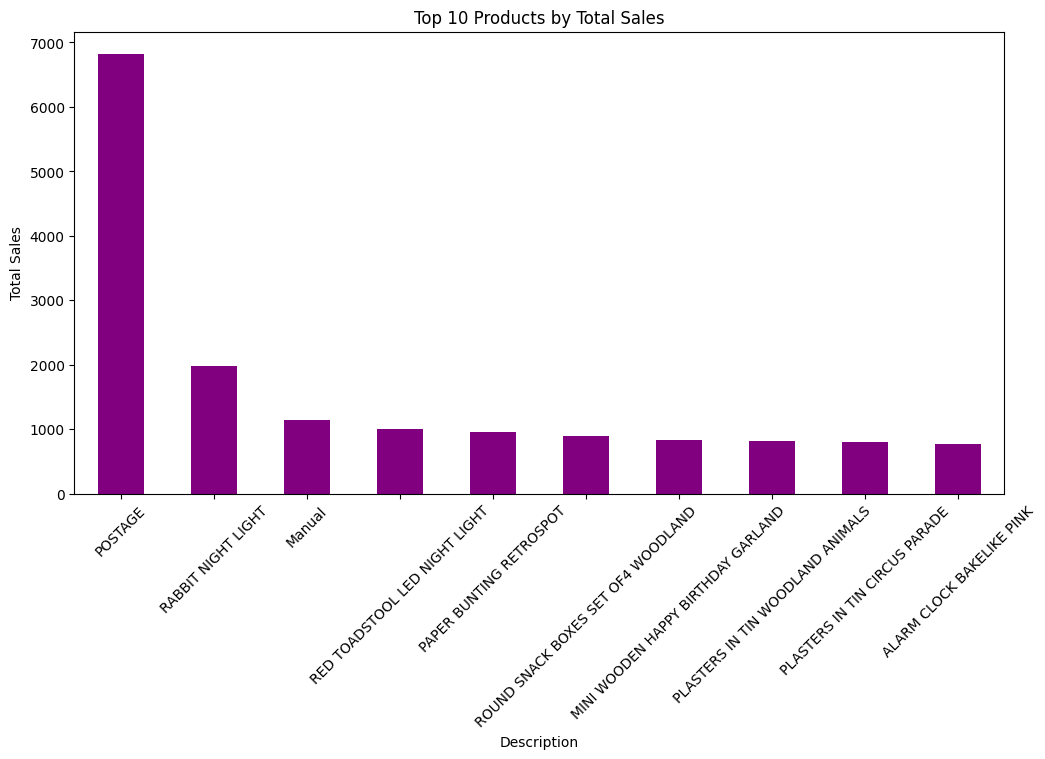

In [38]:
# Top 10 products by total sales
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Explore data for time series analysis (e.g., InvoiceDate)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [40]:
# Total sales over time (monthly)
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum()

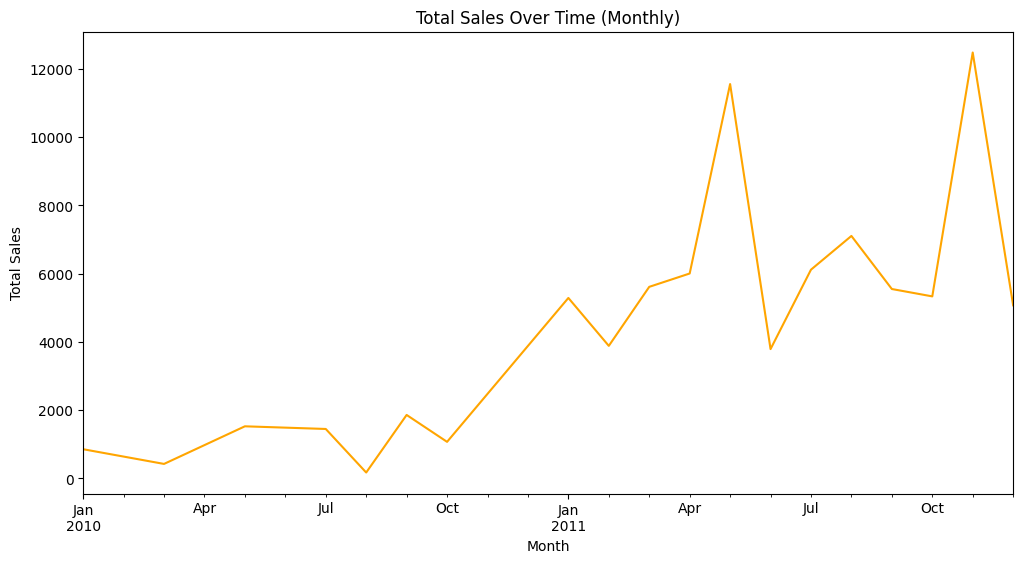

In [41]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='orange')
plt.title('Total Sales Over Time (Monthly)')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

In [42]:
# Average Total Sales per Customer
avg_sales_per_customer = df.groupby('CustomerID')['TotalSales'].mean()

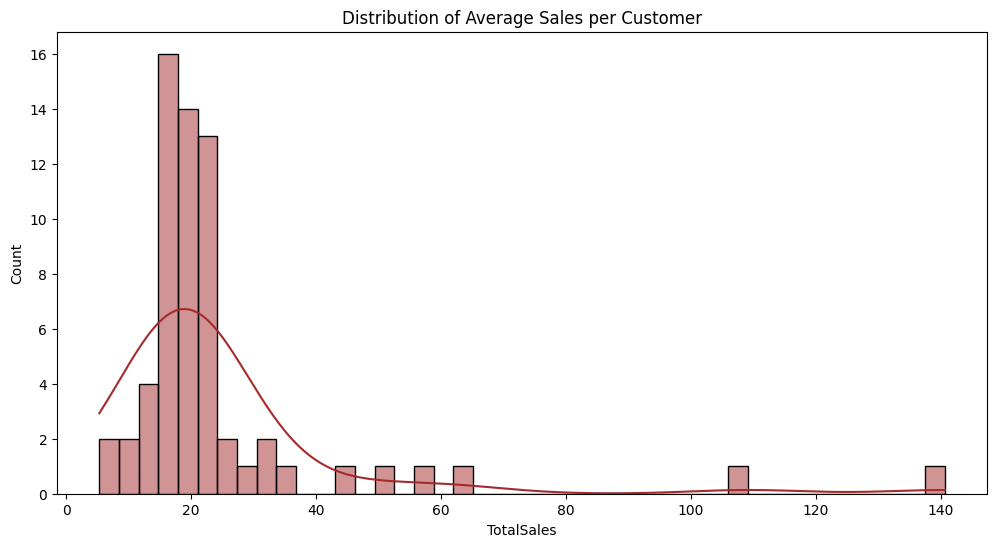

In [43]:
# Distribution of average sales per customer
plt.figure(figsize=(12, 6))
sns.histplot(avg_sales_per_customer, kde=True, color='brown')
plt.title('Distribution of Average Sales per Customer')
plt.show()

In [ ]:




# Heatmap to understand correlations between Quantity, UnitPrice, and TotalSales
sns.pairplot(df[['Quantity', 'UnitPrice', 'TotalSales']])
plt.suptitle('Pairplot for Quantity, UnitPrice, and TotalSales', y=1.02)
plt.show()
